In [23]:
import duckdb
import matplotlib.pyplot as plt

# laptop
file_path = "C:/Users/idavo/.cache/kagglehub/datasets/jeffsinsel/nyc-fhvhv-data/versions/4"

In [24]:
times = duckdb.sql(f"""
    SELECT pickup_datetime, trip_miles, base_passenger_fare, base_passenger_fare / NULLIF(trip_miles, 0) AS fare_per_mile
    FROM "nyc_data.parquet"
""")

print(times)

┌─────────────────────┬────────────┬─────────────────────┬────────────────────┐
│   pickup_datetime   │ trip_miles │ base_passenger_fare │   fare_per_mile    │
│      timestamp      │   double   │       double        │       double       │
├─────────────────────┼────────────┼─────────────────────┼────────────────────┤
│ 2019-02-01 00:05:18 │       2.45 │                9.35 │ 3.8163265306122445 │
│ 2019-02-01 00:41:29 │       1.71 │                7.91 │  4.625730994152047 │
│ 2019-02-01 00:51:34 │       5.01 │               44.96 │  8.974051896207586 │
│ 2019-02-01 00:03:51 │       0.34 │                7.19 │ 21.147058823529413 │
│ 2019-02-01 00:09:44 │       6.84 │               24.25 │ 3.5453216374269005 │
│ 2019-02-01 00:59:55 │       1.11 │                5.75 │   5.18018018018018 │
│ 2019-02-01 00:12:06 │       4.53 │               16.39 │  3.618101545253863 │
│ 2019-02-01 00:45:35 │      11.24 │               29.77 │  2.648576512455516 │
│ 2019-02-01 00:10:48 │       1.59 │    

In [25]:
average = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        AVG(base_passenger_fare) AS avg_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(average)

┌─────────┬────────────────────┐
│  hour   │      avg_fare      │
│ varchar │       double       │
├─────────┼────────────────────┤
│ 00      │ 19.795737178510922 │
│ 01      │ 18.940912403973062 │
│ 02      │  19.11352625596347 │
│ 03      │ 20.095692986371688 │
│ 04      │ 22.801787996747954 │
│ 05      │ 23.108677421486007 │
│ 06      │  22.15246218852899 │
│ 07      │ 20.686920767020794 │
│ 08      │ 19.767285765739583 │
│ 09      │ 18.807021445157886 │
│ ·       │          ·         │
│ ·       │          ·         │
│ ·       │          ·         │
│ 14      │ 20.898910517280555 │
│ 15      │ 21.356091201513923 │
│ 16      │  21.08049748857187 │
│ 17      │ 20.577135483314567 │
│ 18      │ 19.719890660653046 │
│ 19      │ 18.664249936627662 │
│ 20      │  18.74423354699954 │
│ 21      │  19.39092189128948 │
│ 22      │ 20.417459945828455 │
│ 23      │ 20.632450623656343 │
├─────────┴────────────────────┤
│      24 rows (20 shown)      │
└──────────────────────────────┘



In [26]:
percentiles_50 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare, 0.5) AS median_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_50)

┌─────────┬─────────────┐
│  hour   │ median_fare │
│ varchar │   double    │
├─────────┼─────────────┤
│ 00      │        15.1 │
│ 01      │       14.56 │
│ 02      │       14.75 │
│ 03      │       15.45 │
│ 04      │       17.79 │
│ 05      │       17.82 │
│ 06      │        16.8 │
│ 07      │       15.39 │
│ 08      │        14.7 │
│ 09      │       14.11 │
│ ·       │         ·   │
│ ·       │         ·   │
│ ·       │         ·   │
│ 14      │       15.16 │
│ 15      │       15.29 │
│ 16      │       15.15 │
│ 17      │       15.17 │
│ 18      │       14.93 │
│ 19      │       14.21 │
│ 20      │       14.08 │
│ 21      │        14.4 │
│ 22      │       15.33 │
│ 23      │       15.66 │
├─────────┴─────────────┤
│  24 rows (20 shown)   │
└───────────────────────┘



In [27]:
percentiles_25 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare, 0.25) AS median_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_25)

┌─────────┬─────────────┐
│  hour   │ median_fare │
│ varchar │   double    │
├─────────┼─────────────┤
│ 00      │        9.14 │
│ 01      │         8.9 │
│ 02      │        8.93 │
│ 03      │        9.25 │
│ 04      │       10.11 │
│ 05      │        9.92 │
│ 06      │        9.63 │
│ 07      │         9.3 │
│ 08      │        8.99 │
│ 09      │        8.81 │
│ ·       │          ·  │
│ ·       │          ·  │
│ ·       │          ·  │
│ 14      │        9.37 │
│ 15      │        9.44 │
│ 16      │        9.35 │
│ 17      │        9.33 │
│ 18      │         9.2 │
│ 19      │        8.91 │
│ 20      │        8.83 │
│ 21      │        8.93 │
│ 22      │        9.32 │
│ 23      │        9.45 │
├─────────┴─────────────┤
│  24 rows (20 shown)   │
└───────────────────────┘



In [28]:
percentiles_75 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare, 0.75) AS median_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_75)

┌─────────┬─────────────┐
│  hour   │ median_fare │
│ varchar │   double    │
├─────────┼─────────────┤
│ 00      │       24.79 │
│ 01      │       23.76 │
│ 02      │       24.09 │
│ 03      │       25.67 │
│ 04      │       30.09 │
│ 05      │       31.03 │
│ 06      │       29.01 │
│ 07      │       26.07 │
│ 08      │       24.78 │
│ 09      │        23.4 │
│ ·       │          ·  │
│ ·       │          ·  │
│ ·       │          ·  │
│ 14      │       25.42 │
│ 15      │       25.81 │
│ 16      │       25.47 │
│ 17      │        25.2 │
│ 18      │       24.35 │
│ 19      │       22.98 │
│ 20      │       22.81 │
│ 21      │       23.52 │
│ 22      │       25.11 │
│ 23      │        25.7 │
├─────────┴─────────────┤
│  24 rows (20 shown)   │
└───────────────────────┘



In [29]:
percentiles_0 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare, 0) AS median_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_0)

┌─────────┬─────────────┐
│  hour   │ median_fare │
│ varchar │   double    │
├─────────┼─────────────┤
│ 00      │    -1969.59 │
│ 01      │     -501.25 │
│ 02      │     -163.28 │
│ 03      │     -140.19 │
│ 04      │     -229.47 │
│ 05      │     -195.29 │
│ 06      │     -276.43 │
│ 07      │    -1371.49 │
│ 08      │     -185.57 │
│ 09      │     -510.82 │
│ ·       │        ·    │
│ ·       │        ·    │
│ ·       │        ·    │
│ 14      │     -170.22 │
│ 15      │     -147.45 │
│ 16      │     -272.93 │
│ 17      │    -1513.59 │
│ 18      │      -780.2 │
│ 19      │     -325.28 │
│ 20      │     -293.11 │
│ 21      │     -237.05 │
│ 22      │     -333.25 │
│ 23      │     -165.03 │
├─────────┴─────────────┤
│  24 rows (20 shown)   │
└───────────────────────┘



In [30]:
percentiles_100 = duckdb.sql(f"""
    SELECT 
        strftime(pickup_datetime, '%H') AS hour,
        quantile(base_passenger_fare, 1) AS median_fare
    FROM "nyc_data.parquet"
    GROUP BY hour
    ORDER BY hour
""")

print(percentiles_100)

┌─────────┬─────────────┐
│  hour   │ median_fare │
│ varchar │   double    │
├─────────┼─────────────┤
│ 00      │     2419.64 │
│ 01      │     4995.96 │
│ 02      │     3078.21 │
│ 03      │     2398.14 │
│ 04      │      2698.7 │
│ 05      │     2388.35 │
│ 06      │     2678.81 │
│ 07      │      3732.9 │
│ 08      │     2693.98 │
│ 09      │     2614.17 │
│ ·       │        ·    │
│ ·       │        ·    │
│ ·       │        ·    │
│ 14      │     2350.28 │
│ 15      │      2710.5 │
│ 16      │     2856.69 │
│ 17      │      3356.7 │
│ 18      │     2395.37 │
│ 19      │     2506.04 │
│ 20      │     3027.49 │
│ 21      │     8157.74 │
│ 22      │     2672.68 │
│ 23      │     3014.76 │
├─────────┴─────────────┤
│  24 rows (20 shown)   │
└───────────────────────┘



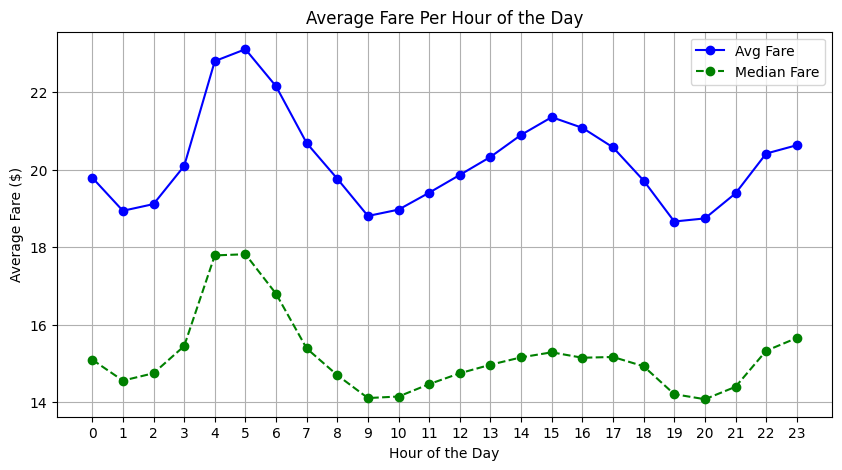

In [31]:
avg_df = average.df()
percentiles_50_df = percentiles_50.df()
# percentiles_25_df = percentiles_25.df()
# percentiles_75_df = percentiles_75.df()

# Convert 'hour' to numeric for proper sorting
avg_df["hour"] = avg_df["hour"].astype(int)
percentiles_50_df["hour"] = percentiles_50_df["hour"].astype(int)
# percentiles_25_df["hour"] = percentiles_25_df["hour"].astype(int)
# percentiles_75_df["hour"] = percentiles_75_df["hour"].astype(int)

# Plot data
plt.figure(figsize=(10, 5))
plt.plot(avg_df["hour"], avg_df["avg_fare"], marker="o", linestyle="-", color="b", label="Avg Fare")
plt.plot(percentiles_50_df["hour"], percentiles_50_df["median_fare"], marker="o", linestyle="--", color="g", label="Median Fare")

# Customize plot
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare Per Hour of the Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(True)
plt.legend()

# Show plot
plt.show()